<a href="https://colab.research.google.com/github/Shehab-Naga/AES-128/blob/main/CIFAR10_CelebA_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from collections import Counter
import pandas as pd
import seaborn as sns
import hashlib


**Load CelebA and CIFAR-10 Datasets**

In [11]:
# Define transformation for CelebA dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CelebA dataset
celeba_trainset = datasets.CelebA(root='./data/celeba', split='train', transform=transform, download=True)
celeba_validset = datasets.CelebA(root='./data/celeba', split='valid', transform=transform, download=True)
celeba_testset = datasets.CelebA(root='./data/celeba', split='test', transform=transform, download=True)

# Create DataLoaders for CelebA
batch_size = 4
celeba_trainloader = DataLoader(celeba_trainset, batch_size=batch_size, shuffle=True)
celeba_validloader = DataLoader(celeba_validset, batch_size=batch_size, shuffle=True)
celeba_testloader = DataLoader(celeba_testset, batch_size=batch_size, shuffle=False)
# Get attribute names from the dataset
attribute_names = celeba_trainset.attr_names

# Remove any empty strings from attribute names
attribute_names = [name for name in attribute_names if name]

# Define transformation for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
cifar_trainset = datasets.CIFAR10(root='./data/cifar10', train=True, transform=transform, download=True)
cifar_testset = datasets.CIFAR10(root='./data/cifar10', train=False, transform=transform, download=True)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.

In [ ]:
# Print sizes of CelebA dataset splits
print(f"CelebA Training set size: {len(celeba_trainset)}")
print(f"CelebA Validation set size: {len(celeba_validset)}")
print(f"CelebA Test set size: {len(celeba_testset)}")

# Print sizes of CIFAR-10 dataset splits
print(f"CIFAR-10 Training set size: {len(cifar_trainset)}")
print(f"CIFAR-10 Test set size: {len(cifar_testset)}")

# create a validation set from the training set of CIFAR-10
val_size = 10000  # Size of the validation set
train_size = len(cifar_trainset) - val_size
cifar_trainset, cifar_validset = random_split(cifar_trainset, [train_size, val_size])

# Print sizes after creating validation set
print(f"CIFAR-10 Training set size after split: {len(cifar_trainset)}")
print(f"CIFAR-10 Validation set size: {len(cifar_validset)}")

# Create DataLoaders for CIFAR-10
cifar_trainloader = DataLoader(cifar_trainset, batch_size=batch_size, shuffle=True)
cifar_validloader = DataLoader(cifar_validset, batch_size=batch_size, shuffle=True)
cifar_testloader = DataLoader(cifar_testset, batch_size=batch_size, shuffle=False)

# Iterate over a batch from the CelebA training dataset
for images, attributes in celeba_trainloader:
    print(f"CelebA Images batch shape: {images.size()}")
    print(f"CelebA Attributes batch shape: {attributes.size()}")
    break

# Iterate over a batch from the CIFAR-10 training dataset
for images, labels in cifar_trainloader:
    print(f"CIFAR-10 Images batch shape: {images.size()}")
    print(f"CIFAR-10 Labels batch shape: {labels.size()}")
    break


CelebA Training set size: 162770
CelebA Validation set size: 19867
CelebA Test set size: 19962
CIFAR-10 Training set size: 50000
CIFAR-10 Test set size: 10000
CIFAR-10 Training set size after split: 40000
CIFAR-10 Validation set size: 10000
CelebA Images batch shape: torch.Size([4, 3, 128, 128])
CelebA Attributes batch shape: torch.Size([4, 40])
CIFAR-10 Images batch shape: torch.Size([4, 3, 32, 32])
CIFAR-10 Labels batch shape: torch.Size([4])


**Visualize random samples from CIFAR-10**


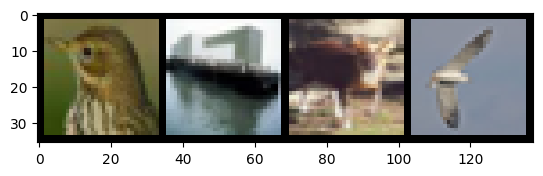

bird  ship  deer  bird 


In [ ]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(cifar_trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
num_columns = 4
for i in range(0, batch_size, num_columns):
    row_labels = ' '.join(f'{classes[labels[j]]:5s}' for j in range(i, min(i + num_columns, batch_size)))
    print(row_labels)


**Visualize random samples from CelebA**


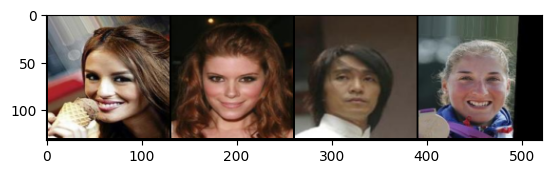

Attributes for image 1:
  5_o_Clock_Shadow: No
  Arched_Eyebrows: No
  Attractive: Yes
  Bags_Under_Eyes: Yes
  Bald: No
  Bangs: No
  Big_Lips: No
  Big_Nose: No
  Black_Hair: No
  Blond_Hair: No
  Blurry: No
  Brown_Hair: Yes
  Bushy_Eyebrows: No
  Chubby: No
  Double_Chin: No
  Eyeglasses: No
  Goatee: No
  Gray_Hair: No
  Heavy_Makeup: Yes
  High_Cheekbones: Yes
  Male: No
  Mouth_Slightly_Open: Yes
  Mustache: No
  Narrow_Eyes: No
  No_Beard: Yes
  Oval_Face: No
  Pale_Skin: No
  Pointy_Nose: No
  Receding_Hairline: No
  Rosy_Cheeks: No
  Sideburns: No
  Smiling: Yes
  Straight_Hair: No
  Wavy_Hair: Yes
  Wearing_Earrings: No
  Wearing_Hat: No
  Wearing_Lipstick: Yes
  Wearing_Necklace: No
  Wearing_Necktie: No
  Young: Yes


Attributes for image 2:
  5_o_Clock_Shadow: No
  Arched_Eyebrows: No
  Attractive: Yes
  Bags_Under_Eyes: No
  Bald: No
  Bangs: No
  Big_Lips: No
  Big_Nose: No
  Black_Hair: No
  Blond_Hair: No
  Blurry: No
  Brown_Hair: Yes
  Bushy_Eyebrows: No
  Chubby: N

In [ ]:
# Get some random training images and labels
dataiter = iter(celeba_trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels with attribute names for each image in the batch
for i in range(batch_size):
    print(f"Attributes for image {i + 1}:")
    for idx, attr in enumerate(labels[i]):
        attr_value = 'Yes' if attr.item() == 1 else 'No'
        print(f"  {attribute_names[idx]}: {attr_value}")
    print("\n")


**Class Imbalance Check for CIFAR-10**

In [ ]:
# Get all labels in the dataset
labels = [label for _, label in cifar_trainset]

# Count occurrences of each label
class_counts = Counter(labels)

# Print class distribution
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
for i, class_name in enumerate(classes):
    print(f'{class_name}: {class_counts[i]}')


plane: 3970
car: 3988
bird: 3974
cat: 4058
deer: 4026
dog: 3980
frog: 4021
horse: 3973
ship: 4032
truck: 3978


**Attributes Distribution for CelebA**

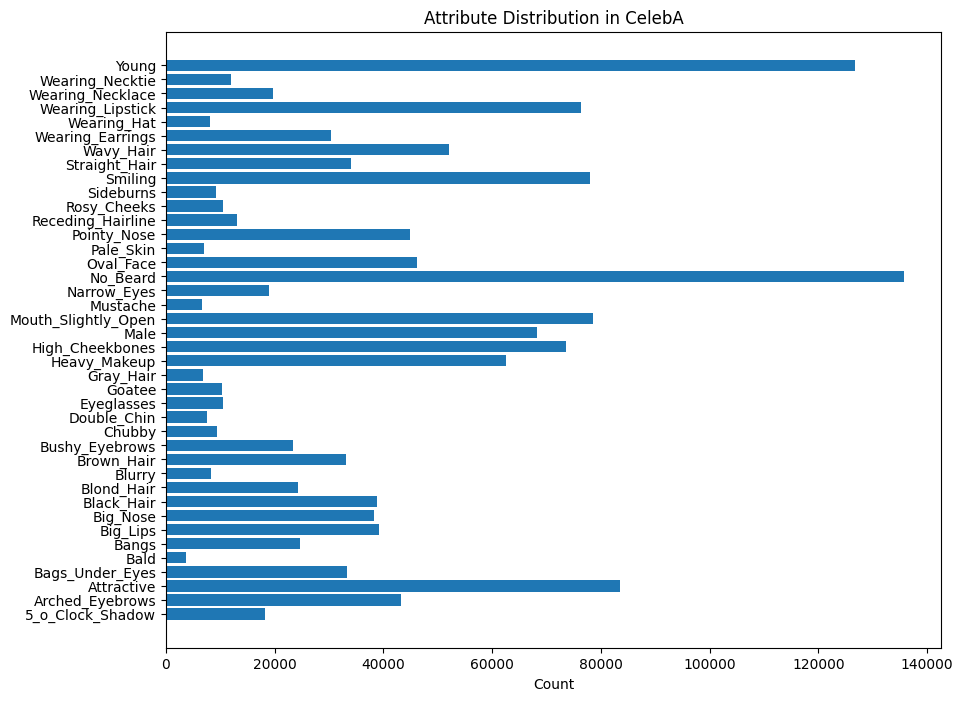

In [ ]:
# Get attribute names from the dataset
attribute_names = celeba_trainset.attr_names

# Remove any empty strings from attribute names
attribute_names = [name for name in attribute_names if name]

# Initialize an array to store attribute counts
attr_counts = np.zeros(len(attribute_names))

# Iterate over the dataset and count the occurrences of each attribute
for _, attributes in celeba_trainloader:
    attr_counts += torch.sum(attributes, dim=0).numpy()

# Plot the attribute distribution
plt.figure(figsize=(10, 8))
plt.barh(attribute_names, attr_counts)
plt.xlabel('Count')
plt.title('Attribute Distribution in CelebA')
# Save the plot as a PNG file
plt.savefig('celeba_attribute_distribution.png', bbox_inches='tight')
plt.show()


**Attribute Correlation for CelebA**

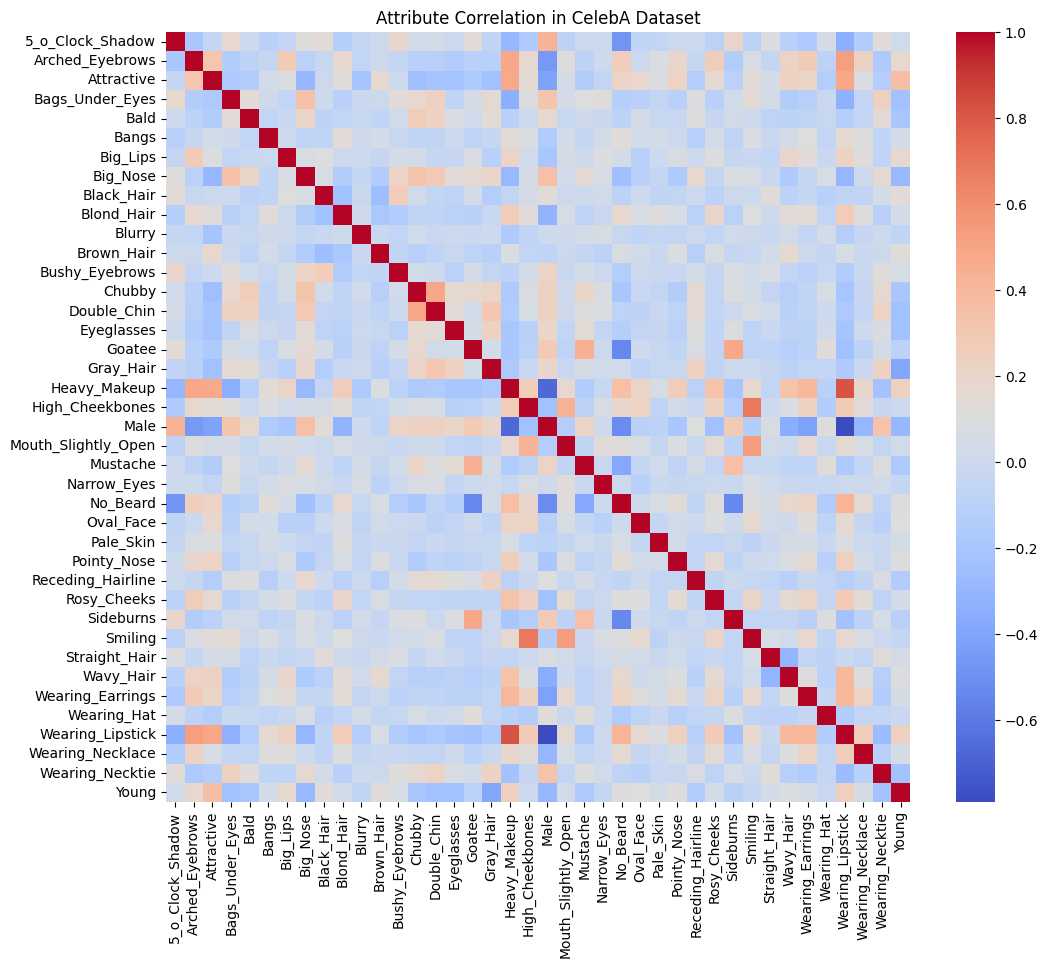

In [ ]:
# Extract attributes for the first 1000 samples
num_samples = 1000
attrs = []

for i in range(num_samples):
    _, attributes = celeba_trainset[i]
    attrs.append(attributes.numpy())

# Convert to a DataFrame for easier analysis
attr_df = pd.DataFrame(attrs, columns=attribute_names)

# Calculate the correlation matrix
correlation_matrix = attr_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Attribute Correlation in CelebA Dataset")
plt.show()


**Color Distribution (RGB Histogram) for CIFAR-10**

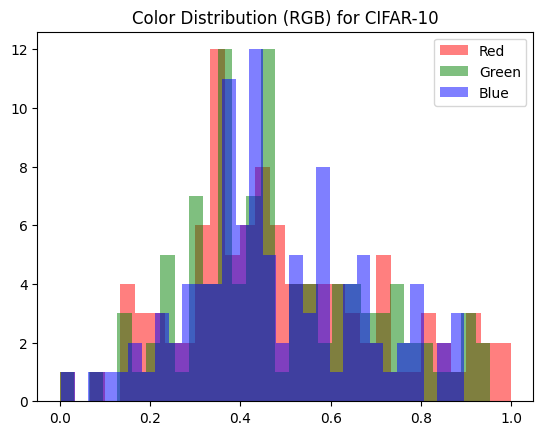

In [ ]:
# Extract RGB values for the first 100 images for quick plotting
r_values = []
g_values = []
b_values = []

# Loop over the first 100 images in the trainset
for i in range(100):
    img, _ = cifar_trainset[i]  # Access image and label
    img_np = np.array(img)  # Convert the image to a NumPy array

    # Append the mean RGB values of the image
    r_values.append(np.mean(img_np[:, :, 0]))  # Red channel
    g_values.append(np.mean(img_np[:, :, 1]))  # Green channel
    b_values.append(np.mean(img_np[:, :, 2]))  # Blue channel

# Plot histograms for RGB channels
plt.hist(r_values, bins=30, color='r', alpha=0.5, label="Red")
plt.hist(g_values, bins=30, color='g', alpha=0.5, label="Green")
plt.hist(b_values, bins=30, color='b', alpha=0.5, label="Blue")
plt.title("Color Distribution (RGB) for CIFAR-10")
plt.legend()
plt.show()


**Color Distribution (RGB Histogram) for CelebA**

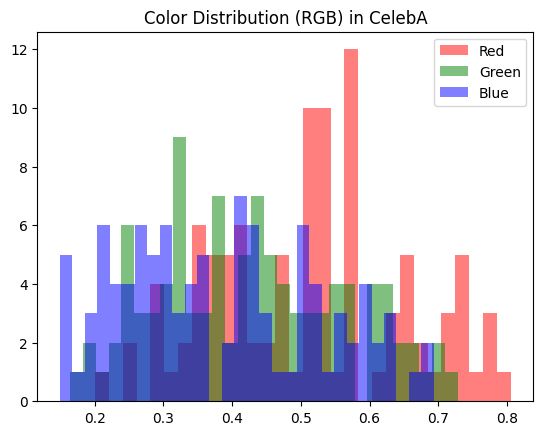

In [ ]:
# Extract RGB values for the first 100 images
r_values = []
g_values = []
b_values = []

for i in range(100):
    img, _ = celeba_trainset[i]  # Access image and label
    img_np = np.array(img.permute(1, 2, 0))  # Convert to NumPy array (H, W, C)

    r_values.append(np.mean(img_np[:, :, 0]))  # Red channel
    g_values.append(np.mean(img_np[:, :, 1]))  # Green channel
    b_values.append(np.mean(img_np[:, :, 2]))  # Blue channel

# Plot histograms for RGB channels
plt.hist(r_values, bins=30, color='r', alpha=0.5, label="Red")
plt.hist(g_values, bins=30, color='g', alpha=0.5, label="Green")
plt.hist(b_values, bins=30, color='b', alpha=0.5, label="Blue")
plt.title("Color Distribution (RGB) in CelebA")
plt.legend()
plt.show()


**Brightness Distribution for CIFAR-10 & CelebA**

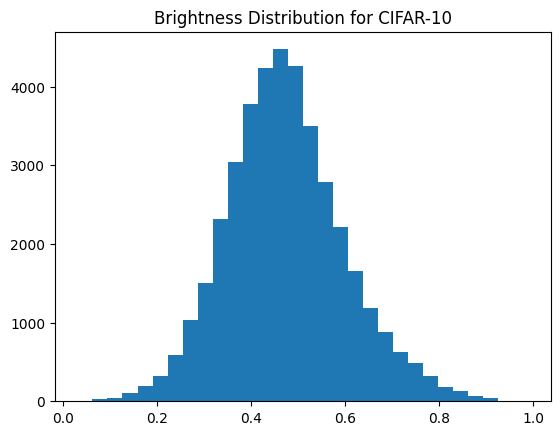

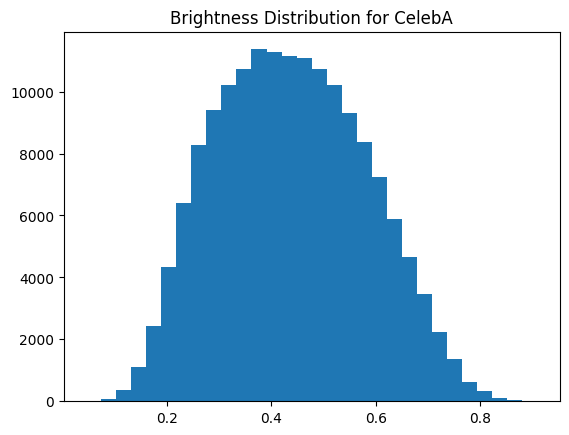

In [ ]:
# Compute brightness for each image (average pixel value across channels)
cifar_brightness = [np.mean(np.array(img)) for img, _ in cifar_trainset]

# Plot the brightness distribution
plt.hist(cifar_brightness, bins=30)
plt.title("Brightness Distribution for CIFAR-10")
plt.show()

# Compute brightness for each image (average pixel value across channels)
celeba_brightness = [np.mean(np.array(img)) for img, _ in celeba_trainset]

# Plot the brightness distribution
plt.hist(celeba_brightness, bins=30)
plt.title("Brightness Distribution for CelebA")
plt.show()

**Check image size for CIFAR-10 & CelebA**

In [ ]:
image_sizes = [img.size() for img, _ in cifar_trainset]
_, cifar_width, cifar_height = zip(*image_sizes)

print(f"Unique image sizes for CIFAR-10: {set(image_sizes)}")

image_sizes = [img.size() for img, _ in celeba_trainset]
_, celeba_width, celeba_height = zip(*image_sizes)
print(f"Unique image sizes for CelebA: {set(image_sizes)}")


Unique image sizes for CIFAR-10: {torch.Size([3, 32, 32])}
Unique image sizes for CelebA: {torch.Size([3, 128, 128])}


**Aspect ratio distribution for CIFAR-10 & CelebA**

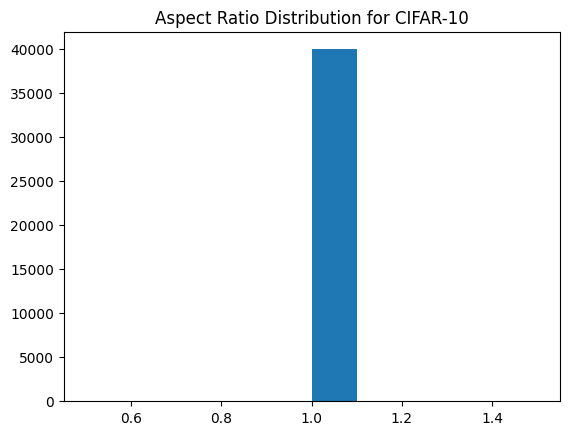

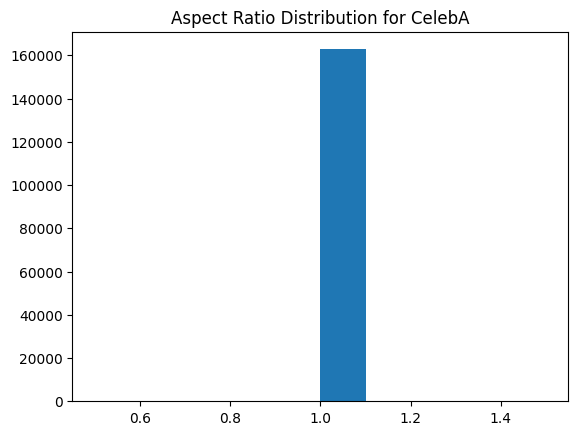

In [ ]:
aspect_ratios = [w/h for w, h in zip(cifar_width, cifar_height)]
plt.hist(aspect_ratios, bins=10)
plt.title("Aspect Ratio Distribution for CIFAR-10")
plt.show()

aspect_ratios = [w/h for w, h in zip(celeba_width, celeba_height)]
plt.hist(aspect_ratios, bins=10)
plt.title("Aspect Ratio Distribution for CelebA")
plt.show()


**Duplicate images check for CIFAR-10 & CelebA**

In [ ]:
# Function to compute the hash of an image
def hash_image(image):
    img_bytes = np.array(image).tobytes()
    return hashlib.md5(img_bytes).hexdigest()

# Check for duplicate images for CIFAR-10
hashes = [hash_image(img) for img, _ in cifar_trainset]
duplicates = [item for item, count in Counter(hashes).items() if count > 1]

print(f"Number of duplicate images for CIFAR-10: {len(duplicates)}")

# Check for duplicate images for CelebA
hashes = [hash_image(img) for img, _ in celeba_trainset]
duplicates = [item for item, count in Counter(hashes).items() if count > 1]

print(f"Number of duplicate images for CelebA: {len(duplicates)}")


Number of duplicate images for CIFAR-10: 0
Number of duplicate images for CelebA: 82
